In [242]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
from pathlib import Path

### Merging evaluation systems results

In [243]:
statistics_path = os.path.join(os.sep, "home", "data")

query_statistics_output_file  = os.path.join(statistics_path, "query_statistics.csv")
ingestion_statistics_output_file = os.path.join(statistics_path, "ingestion_statistics.csv")

figures_path = os.path.join(os.sep, "home", "figures")

In [244]:
for path in (query_statistics_output_file, ingestion_statistics_output_file):
    Path(path).unlink(missing_ok=True)

ingestion_statistics = pd.DataFrame()
query_statistics = pd.DataFrame()

# Aggregate different systems results

for evaluated_system in os.listdir(statistics_path):
    if os.path.isdir(os.path.join(statistics_path, evaluated_system)):
        ingestion_file = os.path.join(statistics_path, evaluated_system, "ingestion_time","ingestion_statistics.csv")
        query_file = os.path.join(statistics_path, evaluated_system, "query_evaluation","statistics.csv")
        if os.path.exists(ingestion_file):
            ingestion_statistics = pd.concat([ingestion_statistics, pd.read_csv(ingestion_file)], ignore_index=True)
        query_statistics = pd.concat([query_statistics, pd.read_csv(query_file)], ignore_index=True)

ingestion_statistics["datasetSize"] = ingestion_statistics["datasetSize"].apply(lambda x: str.capitalize(x))
query_statistics["datasetSize"] = query_statistics["datasetSize"].apply(lambda x: str.capitalize(x))

ingestion_statistics.to_csv(ingestion_statistics_output_file, index=False )
query_statistics.to_csv(query_statistics_output_file, index=False )

In [245]:
# Delete old statistics
for path in (query_statistics_output_file, ingestion_statistics_output_file):
    Path(path).unlink(missing_ok=True)

ingestion_statistics = pd.DataFrame()
query_statistics = pd.DataFrame()

# Aggregate different systems results

for evaluated_system in os.listdir(statistics_path):
    if os.path.isdir(os.path.join(statistics_path, evaluated_system)):
        ingestion_file = os.path.join(statistics_path, evaluated_system, "ingestion_time","ingestion_statistics.csv")
        query_file = os.path.join(statistics_path, evaluated_system, "query_evaluation","statistics.csv")
        if evaluated_system == "pgage":
            pgage = pd.read_csv(ingestion_file)
            # pgage['iteration'] = range(1, len(pgage) + 1)
            # pgage["startTimestamp"] = round(pgage["startTimestamp"]/10,0)
            # pgage["endTimestamp"] = round(pgage["endTimestamp"]/10,0)
            # pgage["graphElapsedTime"] = round(pgage["graphElapsedTime"] * 1000,0)
            # pgage["tsElapsedTime"] = round(pgage["tsElapsedTime"] * 1000,0)
            # pgage["elapsedTime"] = round(pgage["elapsedTime"] * 1000,0)
            # pgage.to_csv(ingestion_file, index=False)
        # query = pd.read_csv(query_file)
        # query.drop(columns=["iteration"], inplace=True)
        # query["temporalRangeIndex"] = 0
        # if (query["model"] == "STGraph").all():
        #     query = add_iteration_column(query, ["model","dataset","datasetSize","queryName","threads","queryType","querySelectivity","numMachines"])
        # else:
        #     query = add_iteration_column(query, ["test_id","model","dataset","datasetSize","threads","queryName","queryType","querySelectivity","numMachines"])
        # query.to_csv(query_file, index=False)
        if os.path.exists(ingestion_file):
            ingestion_statistics = pd.concat([ingestion_statistics, pd.read_csv(ingestion_file)], ignore_index=True)
        query_statistics = pd.concat([query_statistics, pd.read_csv(query_file)], ignore_index=True)

ingestion_statistics["datasetSize"] = ingestion_statistics["datasetSize"].apply(lambda x: str.capitalize(x))
query_statistics["datasetSize"] = query_statistics["datasetSize"].apply(lambda x: str.capitalize(x))

ingestion_statistics.to_csv(ingestion_statistics_output_file, index=False )
query_statistics.to_csv(query_statistics_output_file, index=False )

Utils

In [246]:
query_names = {
    "EnvironmentCoverage": "Q1",
    "EnvironmentAggregate": "Q2",
    "MaintenanceOwners": "Q3",
    "EnvironmentAlert": "Q4",
    "EnvironmentOutlier": "Q4",
    "AgentOutlier": "Q5",
    "AgentHistory": "Q6"
}

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
patterns = ['solid', '...', '///', '/', '|', '-', '+', 'x', 'o', 'O', '.', '*']              # hatch patterns for consistency

## Generating figures

In [247]:
import matplotlib as mpl
font = 16
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'violet']
patterns = ['/', '\\', 'x', 'o', '.']
dataset_order = ["Small", "Medium", "Large"]
legend_settings = {
            "borderpad": 0.2,          # padding inside legend box
            "labelspacing": 0.2,       # vertical space between entries
            "handlelength": 1.0,       # length of legend line
            "handletextpad": 0.3,      # space between line and text
            "borderaxespad":0.2,      # space between legend and axes
            "columnspacing":0.5,       # space between columns (if multiple columns)
            "frameon":False,
            "bbox_to_anchor":(0.5, 1.1),
            "fontsize":font, 
            "loc":"upper center",
}
CLIP_VALUE = 1e5 # Valore di clipping per gestire i fuori scala (es. AeonG)
fig_x = 4
fig_y = 3
mpl.rcParams['font.family'] = 'Times New Roman'

def sci_format(x):
    if pd.isna(x):
        return "--"
    exponent = int(np.floor(np.log10(x)))
    mantissa = x / (10**exponent)
    return f"${mantissa:.1f} \\cdot 10^{{{exponent}}}$"

def print_latex(grouped, pivot=["Benchmark", "Size"]):
    grouped["datasetSize"] = pd.Categorical(grouped["datasetSize"], categories=dataset_order, ordered=True)
    latex_df = grouped \
            .rename(columns={"datasetSize": "Size", "model": "Model", "elapsedTime": "Elapsed Time (s)", "queryID": "ID"}) \
            .replace({"Small": "S", "Medium": "M", "Large": "L"}) \
            .pivot(index=pivot, columns="Model", values="Elapsed Time (s)") \
            .applymap(sci_format)
    print(latex_df.to_latex(index=True, float_format="%.2f", escape=False))

def clean_df(df):
    df["Benchmark"] = "SmartBench"
    df.replace({"Large": "Medium", "Big": "Large", "PGAge": "AGTS"}, inplace=True)
    df["elapsedTime"] = df["elapsedTime"] / 1000  # Convert ms to seconds
    if "graphElapsedTime" in df.columns and "tsElapsedTime" in df.columns:
        df["graphElapsedTime"] = df["graphElapsedTime"] / 1000  # Convert ms to seconds
        df["tsElapsedTime"] = df["tsElapsedTime"] / 1000  # Convert ms to seconds
    return df

Ingestion statistics

/tmp/ipykernel_2118/1829163521.py:34: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  .replace({"Small": "S", "Medium": "M", "Large": "L"}) \
/tmp/ipykernel_2118/1829163521.py:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(sci_format)


\begin{tabular}{lllllll}
\toprule
 & Model & AGTS & AeonG & HyGraph & Neo4J & STGraph \\
Benchmark & Size &  &  &  &  &  \\
\midrule
\multirow[t]{3}{*}{SmartBench} & S & $1.6 \cdot 10^{2}$ & $1.1 \cdot 10^{8}$ & $3.5 \cdot 10^{1}$ & $4.3 \cdot 10^{4}$ & $1.1 \cdot 10^{2}$ \\
 & M & $9.6 \cdot 10^{2}$ & $1.1 \cdot 10^{9}$ & $8.5 \cdot 10^{1}$ & -- & $3.4 \cdot 10^{2}$ \\
 & L & $1.2 \cdot 10^{5}$ & -- & -- & -- & $4.4 \cdot 10^{3}$ \\
\cline{1-7}
\bottomrule
\end{tabular}

Model: AGTS, Dataset: Small, Elapsed Time (s): 163.1174761904762
Model: AGTS, Dataset: Medium, Elapsed Time (s): 957.1155438596492
Model: AGTS, Dataset: Large, Elapsed Time (s): 119330.22466666666
Model: AeonG, Dataset: Small, Elapsed Time (s): 108106495.6102
Model: AeonG, Dataset: Medium, Elapsed Time (s): 1093899772.2966666
Model: HyGraph, Dataset: Small, Elapsed Time (s): 34.81
Model: HyGraph, Dataset: Medium, Elapsed Time (s): 84.55666666666667
Model: Neo4J, Dataset: Small, Elapsed Time (s): 43438.747
Model: STGra

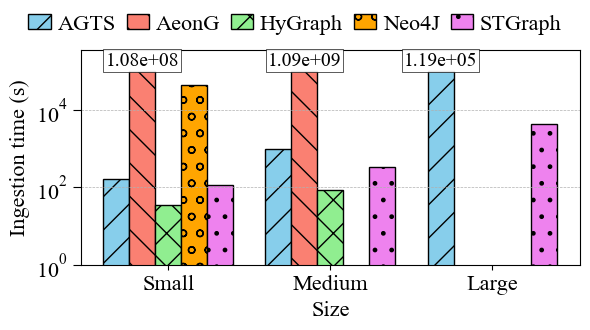

In [248]:
def print_ingestion_statistics(ingestion_statistics: pd.DataFrame):
    """
    Print ingestion statistics bar plot (log scale, clipped values, scalable patterns),
    con padding minimo sopra il limite di clipping.
    """
    import matplotlib.patches as mpatches

    df = clean_df(ingestion_statistics.copy(deep=True))
    df = df[df["threads"] == 1]
    df = df[~((df["model"] == "Neo4J") & (df["datasetSize"] == "Medium"))]
    mask = df["model"] == "AeonG"
    df.loc[mask, "datasetSize"] = (df.loc[mask, "datasetSize"].replace({"Small": "Medium", "Medium": "Small"}))
    grouped = df.groupby(["Benchmark", "datasetSize", "model"])["elapsedTime"].mean().reset_index()
    print_latex(grouped)
    all_models = sorted(grouped["model"].unique())
    num_models = len(all_models)
    bar_width = min(0.8 / num_models, 0.18)
    x = np.arange(len(dataset_order))
    fig, ax = plt.subplots(figsize=(fig_x * 1.5, fig_y))
    for i, model in enumerate(all_models):
        offset = (i - (num_models - 1) / 2) * bar_width
        for j, ds in enumerate(dataset_order):
            subset = grouped[(grouped["datasetSize"] == ds) & (grouped["model"] == model)]
            if subset.empty:
                continue
            print(f"Model: {model}, Dataset: {ds}, Elapsed Time (s): {subset['elapsedTime'].values[0]}")
            value = subset["elapsedTime"].values[0]
            display_value = min(value, CLIP_VALUE)
            ax.bar(x[j] + offset, display_value, width=bar_width, color=colors[i % len(colors)], edgecolor='black', hatch=patterns[i % len(patterns)], label=model if j == 0 else None)
            if value > CLIP_VALUE:
                ax.text(x[j] + offset, CLIP_VALUE * 1.1, f"{value:.2e}", va='bottom', ha='center', fontsize=font - 2, rotation=0, bbox=dict(facecolor='white', edgecolor='black', linewidth=0.5, alpha=0.9, pad=1.5))
    ax.set_xticks(x)
    ax.set_xticklabels(dataset_order, fontsize=font)
    ax.set_xlabel("Size", fontsize=font)
    ax.set_yscale("log")
    ax.set_ylim(1, CLIP_VALUE * 3.5)
    ax.tick_params(axis='y', which='both', length=6, labelsize=font)
    ax.yaxis.grid(True, linestyle='--', linewidth=0.5, which='major')
    ax.set_ylabel("Ingestion time (s)", fontsize=font)
    handles = [
        mpatches.Patch(facecolor=colors[i % len(colors)], hatch=patterns[i % len(patterns)], edgecolor='black', label=model)
        for i, model in enumerate(all_models)
    ]
    fig.legend(handles=handles, ncol=len(all_models), **legend_settings)
    plt.tight_layout()
    plt.savefig(os.path.join(figures_path, "ingestion_statistics.pdf"), bbox_inches='tight')
    plt.show()


print_ingestion_statistics(ingestion_statistics)

Query statistics - <b>different</b> selectivity across dataset size

/tmp/ipykernel_2118/1829163521.py:34: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  .replace({"Small": "S", "Medium": "M", "Large": "L"}) \
/tmp/ipykernel_2118/1829163521.py:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(sci_format)


\begin{tabular}{llllllll}
\toprule
 &  & Model & AGTS & AeonG & HyGraph & Neo4J & STGraph \\
Benchmark & Size & ID &  &  &  &  &  \\
\midrule
\multirow[t]{18}{*}{SmartBench} & \multirow[t]{6}{*}{S} & Q1 & $1.0 \cdot 10^{-2}$ & $1.3 \cdot 10^{-2}$ & $6.3 \cdot 10^{-2}$ & $1.5 \cdot 10^{-1}$ & $2.5 \cdot 10^{-3}$ \\
 &  & Q2 & $1.4 \cdot 10^{0}$ & $2.9 \cdot 10^{1}$ & $7.2 \cdot 10^{2}$ & $1.4 \cdot 10^{0}$ & $2.7 \cdot 10^{0}$ \\
 &  & Q3 & $1.1 \cdot 10^{0}$ & $5.4 \cdot 10^{1}$ & $5.6 \cdot 10^{4}$ & $1.4 \cdot 10^{0}$ & $1.6 \cdot 10^{0}$ \\
 &  & Q4 & $3.8 \cdot 10^{1}$ & $3.4 \cdot 10^{1}$ & $5.9 \cdot 10^{4}$ & -- & $4.1 \cdot 10^{0}$ \\
 &  & Q5 & $3.4 \cdot 10^{0}$ & $7.4 \cdot 10^{1}$ & $3.6 \cdot 10^{0}$ & $1.5 \cdot 10^{0}$ & $2.7 \cdot 10^{0}$ \\
 &  & Q6 & $3.6 \cdot 10^{-1}$ & $1.2 \cdot 10^{-2}$ & $2.4 \cdot 10^{-2}$ & $2.6 \cdot 10^{-2}$ & $2.0 \cdot 10^{-2}$ \\
\cline{2-8}
 & \multirow[t]{6}{*}{M} & Q1 & $7.9 \cdot 10^{-2}$ & $2.0 \cdot 10^{-2}$ & $2.3 \cdot 10^{-1}$ & 

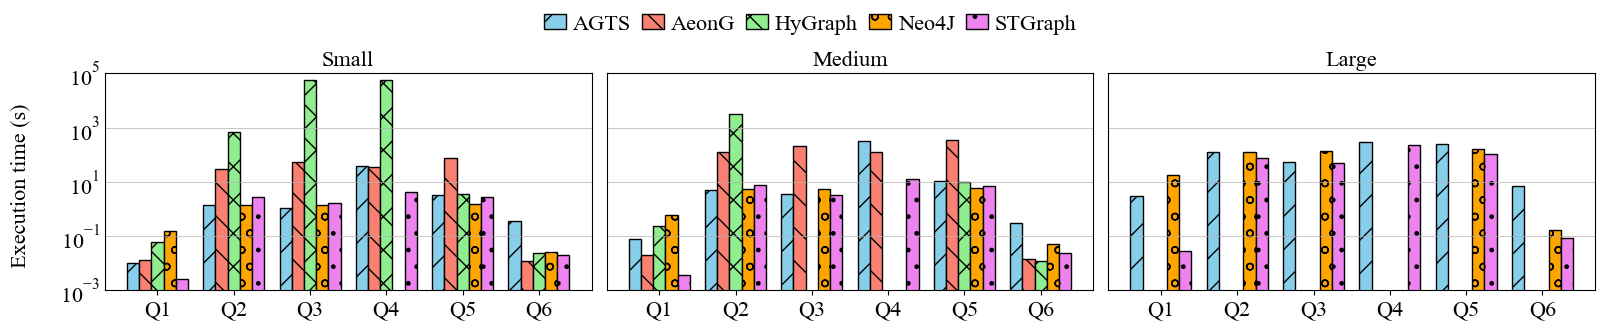

In [249]:
def print_query_statistics(query_statistics: pd.DataFrame, name="query_statistics"):
    query_df = clean_df(query_statistics.copy(deep=True))
    query_df = query_df[query_df["datasetSize"] != "big_long"]
    query_df["queryID"] = query_df["queryName"].map(query_names)
    query_df = query_df.dropna(subset=["queryID"])
    print_latex(query_df.groupby(["Benchmark", "datasetSize", "queryID", "model"])["elapsedTime"].mean().reset_index(), pivot=["Benchmark", "Size", "ID"])

    fig, axes = plt.subplots(1, len(dataset_order), figsize=(4 * fig_x, fig_y), sharey=True)
    if len(dataset_order) == 1: axes = [axes]
    all_models = sorted(query_df["model"].unique())
    num_models = len(all_models)
    bar_width = min(0.8 / num_models, 0.18)
    for ax, ds in zip(axes, dataset_order):
        df_filtered = query_df[(query_df["threads"] == 1) & (query_df["datasetSize"] == ds)]
        grouped = df_filtered.groupby(["queryID", "model"])["elapsedTime"].mean().reset_index()
        query_ids = sorted(grouped["queryID"].unique())
        x = np.arange(len(query_ids))

        for i, model in enumerate(all_models):
            values = [
                grouped[
                    (grouped["queryID"] == q) &
                    (grouped["model"] == model)
                ]["elapsedTime"].values[0]
                if not grouped[
                    (grouped["queryID"] == q) &
                    (grouped["model"] == model)
                ].empty
                else np.nan
                for q in query_ids
            ]

            offset = (i - (num_models - 1) / 2) * bar_width

            ax.bar(
                x + offset,
                values,
                width=bar_width,
                color=colors[i % len(colors)],
                edgecolor="black",
                hatch=patterns[i % len(patterns)],
                label=model if ds == dataset_order[0] else None
            )

        # --- X axis ---
        ax.set_xticks(x)
        ax.set_xticklabels(query_ids, fontsize=font)  # tick X più grandi

        # --- Y axis ---
        ax.set_yscale("log")
        ax.set_ylim(0.001, CLIP_VALUE)
        ax.tick_params(axis="y", which="major", labelsize=font)
        ax.tick_params(axis="y", which="both", length=0)
        ax.yaxis.grid(True, which='major', linestyle='-', linewidth=0.5)
        ax.set_title(ds, fontsize=font)

    ylabel = fig.supylabel("Execution time (s)", fontsize=font)
    ylabel.set_position((-0.00005, 0.5))  # sposta più vicino ai tick senza sovrapporsi
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, ncol=len(all_models), **legend_settings)
    plt.tight_layout()  # margini ottimizzati
    plt.savefig(os.path.join(figures_path, "query_statistics.pdf"), bbox_inches='tight')
    plt.show()

query_statistics_different_selectivity = query_statistics.loc[query_statistics["querySelectivity"] == "increased"]
print_query_statistics(query_statistics_different_selectivity, "query_statistics_increased")

In [250]:
query_statistics_different_selectivity = query_statistics_different_selectivity.loc[((query_statistics_different_selectivity["model"] == "STGraph") | (query_statistics_different_selectivity["model"] == "PGAge") | (query_statistics_different_selectivity["model"] == "Neo4J")) & (query_statistics_different_selectivity["datasetSize"] == "Big")]
query_statistics_different_selectivity.groupby(by=["queryName", "model"]).agg({"elapsedTime": "mean"})

elapsedTime
queryName             model                 
AgentHistory          Neo4J       172.405000
                      PGAge      6946.162500
                      STGraph      86.214286
AgentOutlier          Neo4J    159151.393750
                      PGAge    248474.622000
                      STGraph  106459.571429
EnvironmentAggregate  Neo4J    130035.456000
                      PGAge    120584.652000
                      STGraph   75804.380952
EnvironmentAggregate2 Neo4J    135568.810000
                      PGAge     21751.338000
                      STGraph   48035.923077
EnvironmentCoverage   Neo4J     17351.847778
                      PGAge      2952.172500
                      STGraph      28.076923
EnvironmentOutlier    PGAge    294772.324000
                      STGraph  231440.846154
MaintenanceOwners     Neo4J    141987.900000
                      PGAge     55860.412500
                      STGraph   47639.307692

#### Query perforamnces w.r.t. different temporal filter coverage

Big dataset

Processing model: Neo4J for query: Q2 with 50 entries.
Resulting series for model Neo4J:
temporalRangeIndex
0    126252.990
1    139858.198
2    152988.716
3    165842.656
4    181118.512
5    193592.368
6    205862.626
7    218109.246
8    232067.448
9    246554.318
Name: elapsedTime, dtype: float64

Valid indices for model Neo4J: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Processing model: PGAge for query: Q2 with 100 entries.
Resulting series for model PGAge:
temporalRangeIndex
0     106050.544
1     214822.337
2     322080.983
3     432672.481
4     537632.527
5     648166.703
6     752331.812
7     873412.968
8     975260.212
9    1080522.666
Name: elapsedTime, dtype: float64

Valid indices for model PGAge: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Processing model: STGraph for query: Q2 with 97 entries.
Resulting series for model STGraph:
temporalRangeIndex
0     73536.300000
1     93802.800000
2    112893.600000
3    134985.300000
4    152162.500000
5    174760.300000
6    186526.200000
7    207750.33

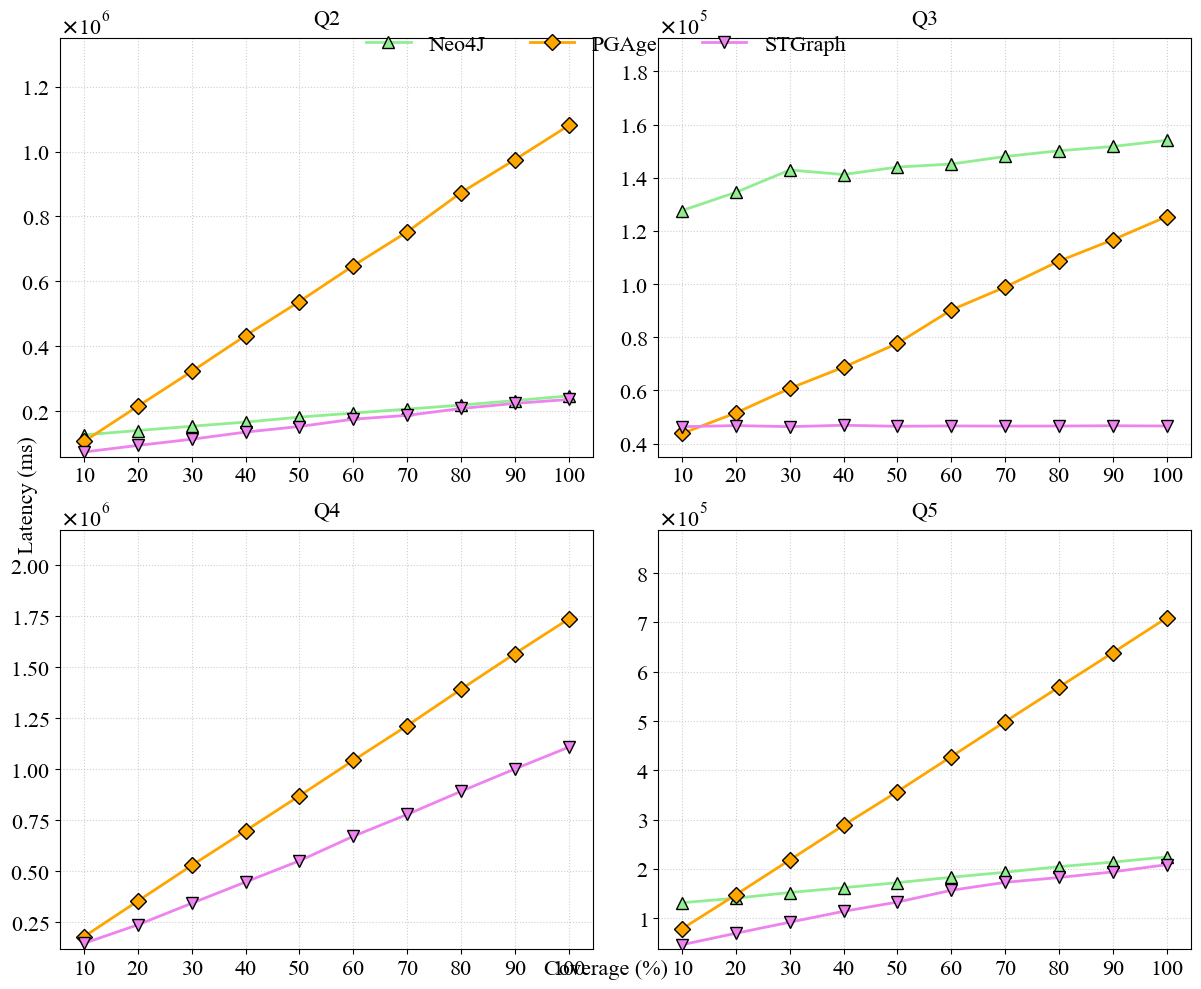

In [ ]:
def plot_execution_times_selectivity(df, dataset_size, threads):
    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker
    import numpy as np
    import os

    model_mapping = {
        "AeonG":    {"color": "skyblue",    "marker": "o"},
        "HyGraph":  {"color": "salmon",     "marker": "s"},
        "Neo4J":    {"color": "lightgreen", "marker": "^"},
        "PGAge":    {"color": "orange",     "marker": "D"},
        "STGraph":  {"color": "violet",     "marker": "v"}
    }

    coverage_map = {i: round((i + 1) * 10, 1) for i in range(10)}
    df_f = df[(df['datasetSize'] == dataset_size) & (df['threads'] == threads)].copy()
    df_f['queryName'] = df_f['queryName'].map(query_names)
    df_f = df_f.loc[~df_f["queryName"].isin(["Q1", "Q6"])].dropna(subset=['queryName'])

    if df_f.empty: return

    queries = sorted(df_f['queryName'].unique())
    ncols, nrows = (len(queries) + 1) // 2, 2

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6 * ncols, 5 * nrows))
    axes_flat = axes.flatten()

    global_handles = {}

    for i, query in enumerate(queries):
        ax = axes_flat[i]
        df_query = df_f[df_f['queryName'] == query]

        if query == "Q4":
            df_query = df_query[df_query["model"] != "Neo4J"]

        local_models = sorted(df_query['model'].unique())
        y_values_all = []

        for model in local_models:
            df_model = df_query[df_query['model'] == model]
            print(f"Processing model: {model} for query: {query} with {len(df_model)} entries.")
            res = (
                df_model
                .groupby('temporalRangeIndex')['elapsedTime']
                .mean()
                .sort_index()
            )
            print(f"Resulting series for model {model}:\n{res}\n")

            # ---- QUI LA PARTE ROBUSTA ----
            if res.empty:
                continue

            valid_idx = [idx for idx in res.index if idx in coverage_map]
            print(f"Valid indices for model {model}: {valid_idx}")
            if not valid_idx:
                continue

            x = [coverage_map[idx] for idx in valid_idx]
            y = [res.loc[idx] for idx in valid_idx]

            if len(x) == 0:
                continue
            # -----------------------------

            y_values_all.extend(y)

            cfg = model_mapping.get(model, {"color": "gray", "marker": "x"})
            line, = ax.plot(
                x, y,
                color=cfg['color'],
                marker=cfg['marker'],
                label=model,
                linewidth=2,
                markersize=8,
                markeredgecolor='black'
            )

            if model not in global_handles:
                global_handles[model] = line

        if not y_values_all:
            continue

        ax.set_yscale("linear")
        formatter = ticker.ScalarFormatter(useMathText=True)
        ax.yaxis.set_major_formatter(formatter)
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        ax.yaxis.get_offset_text().set_fontsize(16)

        y_min, y_max = min(y_values_all), max(y_values_all)
        ax.set_ylim(y_min * 0.8, y_max * 1.25)

        ax.set_title(f"{query}", fontsize=font, pad=10)
        ax.set_xticks([10,20,30,40,50,60,70,80,90,100])
        ax.tick_params(axis='both', which='major', labelsize=font)
        ax.grid(True, which="both", linestyle=':', alpha=0.6)

    fig.text(0.5, 0.02, 'Coverage (%)', ha='center', fontsize=font)
    fig.text(0.01, 0.5, 'Latency (ms)', va='center', rotation='vertical', fontsize=font)

    sorted_model_names = sorted(global_handles.keys())
    ordered_handles = [global_handles[m] for m in sorted_model_names]
    fig.legend(
        ordered_handles, sorted_model_names,
        loc='upper center',
        ncol=len(sorted_model_names),
        bbox_to_anchor=(0.5, 0.98),
        fontsize=font,
        frameon=False
    )

    for j in range(i + 1, len(axes_flat)):
        fig.delaxes(axes_flat[j])

    plt.tight_layout() # rect=[0.03, 0.05, 1, 0.92]
    plt.savefig(os.path.join(figures_path, f"query_selectivity_{dataset_size}.pdf"), bbox_inches='tight')
    plt.show()


quer_dset = query_statistics.loc[query_statistics["querySelectivity"] == "scaled"]
plot_execution_times_selectivity(quer_dset, "Big", 1)

Large dataset

In [252]:
quer_dset.loc[(quer_dset["model"] == "STGraph") & (quer_dset["querySelectivity"] == "scaled")]

,test_id,model,dataset,datasetSize,threads,queryName,queryType,elapsedTime,numEntities,numMachines,querySelectivity,temporalRangeIndex,iteration
10530,4eb6e0a1-f002-4897-ab7a-2bbcb2372622,STGraph,smartbench,Large,1,EnvironmentCoverage,edgesDirection,50.0,22,1,scaled,0,0.0
10531,4eb6e0a1-f002-4897-ab7a-2bbcb2372622,STGraph,smartbench,Large,1,EnvironmentCoverage,edgesDirection,9.0,22,1,scaled,1,0.0
10532,4eb6e0a1-f002-4897-ab7a-2bbcb2372622,STGraph,smartbench,Large,1,EnvironmentCoverage,edgesDirection,8.0,22,1,scaled,2,0.0
10533,4eb6e0a1-f002-4897-ab7a-2bbcb2372622,STGraph,smartbench,Large,1,EnvironmentCoverage,edgesDirection,9.0,22,1,scaled,3,0.0
10534,4eb6e0a1-f002-4897-ab7a-2bbcb2372622,STGraph,smartbench,Large,1,EnvironmentCoverage,edgesDirection,8.0,22,1,scaled,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13140,ed5e7c7b-d759-4eda-a6c5-229e82b74b04,STGraph,smartbench,Big,1,EnvironmentAggregate,edgesDirection,166592.0,112,1,scaled,5,6.0
13141,ed5e7c7b-d759-4eda-a6c5-229e82b74b04,STGraph,smartbench,Big,1,EnvironmentAggregate,edgesDirection,184688.0,112,1,scaled,6,6.0
13142,ed5e7c7b-d759-4eda-a6c5-229e82b74b04,STGraph,smartbench,Big,1,EnvironmentAggregate,edgesDirection,202690.0,112,1,scaled,7,6.0
13143,ed5e7c7b-d759-4eda-a6c5-229e82b74b04,STGraph,smartbench,Big,1,EnvironmentAggregate,edgesDirection,218613.0,112,1,scaled,8,6.0


In [253]:
quer_dset.loc[(quer_dset["model"] == "AeonG") & (quer_dset["querySelectivity"] == "scaled")]

,test_id,model,dataset,datasetSize,threads,queryName,queryType,elapsedTime,numEntities,numMachines,querySelectivity,temporalRangeIndex,iteration
2208,68807b4a-9dff-48e8-9242-f520f4ccfe19,AeonG,smartbench,Large,1,AgentHistory,edgesDirection,14.0,-1,1,scaled,3,1.0
2209,68807b4a-9dff-48e8-9242-f520f4ccfe19,AeonG,smartbench,Large,1,AgentHistory,edgesDirection,15.0,-1,1,scaled,7,1.0
2211,68807b4a-9dff-48e8-9242-f520f4ccfe19,AeonG,smartbench,Large,1,EnvironmentCoverage,edgesDirection,22.0,-1,1,scaled,9,1.0
2214,68807b4a-9dff-48e8-9242-f520f4ccfe19,AeonG,smartbench,Large,1,AgentOutlier,edgesDirection,186352.0,-1,1,scaled,1,1.0
2215,68807b4a-9dff-48e8-9242-f520f4ccfe19,AeonG,smartbench,Large,1,EnvironmentCoverage,edgesDirection,18.0,-1,1,scaled,6,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2344,68807b4a-9dff-48e8-9242-f520f4ccfe19,AeonG,smartbench,Large,1,EnvironmentOutlier,edgesDirection,408742.0,-1,1,scaled,5,1.0
2345,68807b4a-9dff-48e8-9242-f520f4ccfe19,AeonG,smartbench,Large,1,AgentOutlier,edgesDirection,465898.0,-1,1,scaled,4,1.0
2346,68807b4a-9dff-48e8-9242-f520f4ccfe19,AeonG,smartbench,Large,1,AgentHistory,edgesDirection,13.0,-1,1,scaled,6,2.0
2347,68807b4a-9dff-48e8-9242-f520f4ccfe19,AeonG,smartbench,Large,1,MaintenanceOwners,edgesDirection,300121.0,-1,1,scaled,3,1.0


Processing model: AeonG for query: Q2 with 6 entries.
Resulting series for model AeonG:
temporalRangeIndex
0     95415.0
1    186926.0
2    286440.0
3    376085.0
4    469209.0
5    560351.0
Name: elapsedTime, dtype: float64

Valid indices for model AeonG: []
Processing model: HyGraph for query: Q2 with 100 entries.
Resulting series for model HyGraph:
temporalRangeIndex
0.0    3099930.0
1.0    3102218.0
2.0    3101124.0
3.0    3098854.1
4.0    3101969.4
5.0    3100126.4
6.0    3102512.7
7.0    3102230.3
8.0    3104666.6
9.0    3101946.0
Name: elapsedTime, dtype: float64

Valid indices for model HyGraph: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
Processing model: Neo4J for query: Q2 with 200 entries.
Resulting series for model Neo4J:
temporalRangeIndex
0    5453.4895
1    5705.6895
2    6080.8015
3    6554.6955
4    6805.0300
5    7153.0500
6    7661.1805
7    7938.6515
8    8395.2385
9    8738.0710
Name: elapsedTime, dtype: float64

Valid indices for model Neo4J: [0, 1, 2, 3, 

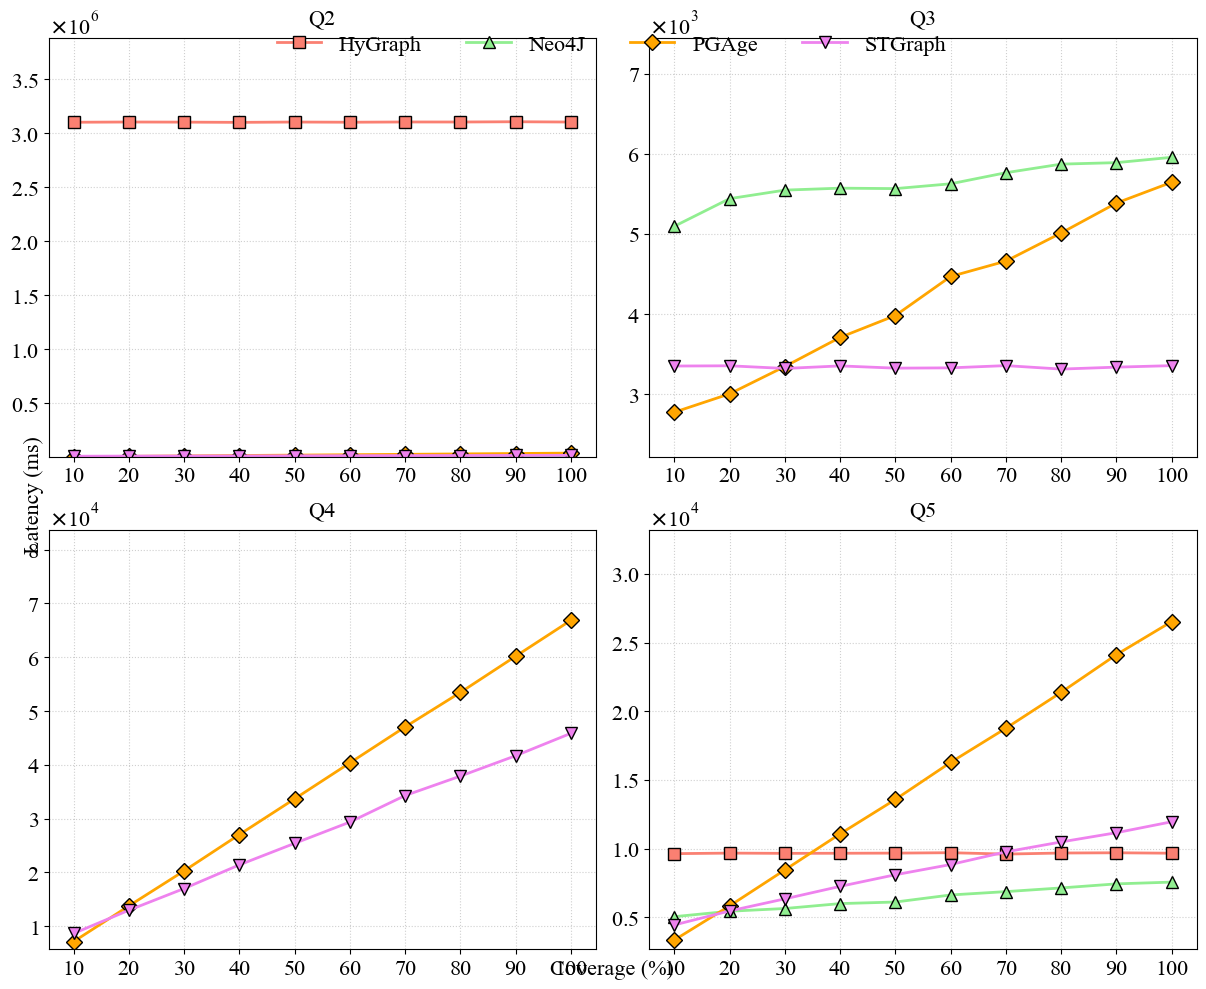

In [254]:
quer_dset = query_statistics.loc[query_statistics["querySelectivity"] == "scaled"]
plot_execution_times_selectivity(quer_dset, "Large", 1)


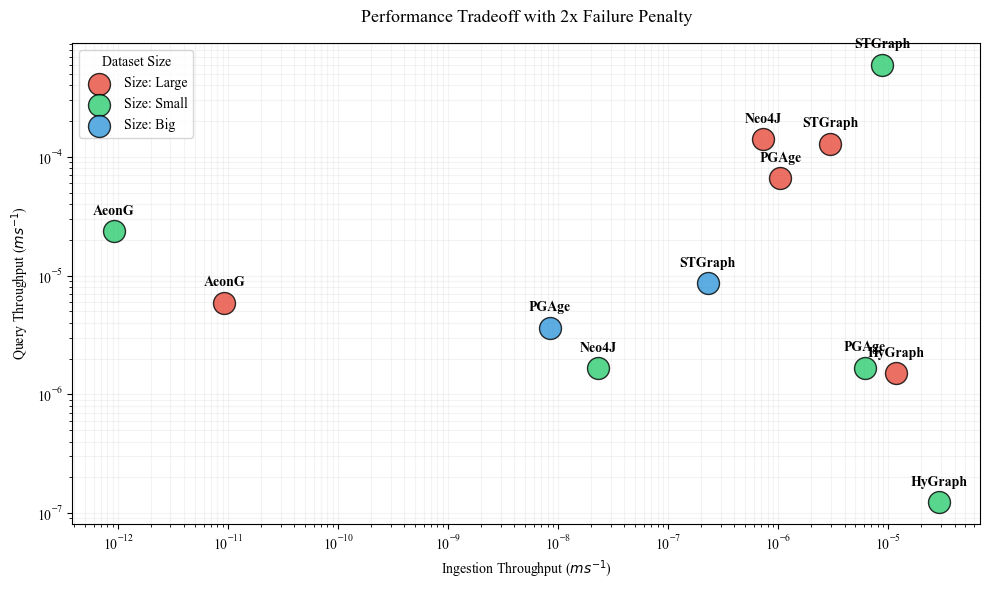

In [255]:
# 
import pandas as pd
import matplotlib.pyplot as plt

def plot_performance_penalty_tradeoff(df_queries, df_ingestion):
    """
    Plots performance tradeoff. If a query is missing for a model, it imputes 
    a penalty: 2x the worst time recorded by other models for that specific query.
    """
    # 1. Copy and normalize
    q = df_queries.copy()
    i = df_ingestion.copy()
    
    for df in [q, i]:
        df['model'] = df['model'].astype(str).str.strip()
        df['datasetSize'] = df['datasetSize'].astype(str).str.strip()

    # 2. Thread filter
    q = q[q['threads'] == 1]
    i = i[i['threads'] == 1]

    # 3. Penalty Imputation Logic
    all_queries = q['queryName'].unique()
    all_models = q['model'].unique()
    all_sizes = q['datasetSize'].unique()
    
    imputed_rows = []

    for size in all_sizes:
        for query in all_queries:
            # Find the worst time (max) for this specific query and size among all models
            worst_time = q[(q['queryName'] == query) & (q['datasetSize'] == size)]['elapsedTime'].max()
            
            # If no one completed it, we can't impute (should not happen in a benchmark)
            if pd.isna(worst_time): continue
            
            penalty_time = worst_time * 2
            
            for model in all_models:
                # Check if the model is missing this specific query
                check = q[(q['model'] == model) & (q['datasetSize'] == size) & (q['queryName'] == query)]
                
                if check.empty:
                    # Create a penalty row
                    imputed_rows.append({
                        'model': model,
                        'datasetSize': size,
                        'queryName': query,
                        'elapsedTime': penalty_time,
                        'threads': 1
                    })

    # Add penalty rows to the original dataframe
    if imputed_rows:
        q = pd.concat([q, pd.DataFrame(imputed_rows)], ignore_index=True)

    # 4. Aggregation
    q_agg = q.groupby(['model', 'datasetSize'])['elapsedTime'].mean().reset_index()
    q_agg.rename(columns={'elapsedTime': 'query_time_ms'}, inplace=True)

    i_agg = i.groupby(['model', 'datasetSize'])['elapsedTime'].mean().reset_index()
    i_agg.rename(columns={'elapsedTime': 'ingestion_time_ms'}, inplace=True)

    # 5. Merge and Throughput
    df_plot = pd.merge(q_agg, i_agg, on=['model', 'datasetSize'])
    df_plot['ingestion_throughput'] = 1 / df_plot['ingestion_time_ms'] 
    df_plot['query_throughput'] = 1 / df_plot['query_time_ms']

    # 6. Plotting
    plt.figure(figsize=(10, 6))
    colors = {'Small': '#2ecc71', 'Large': '#e74c3c'}

    for size in df_plot['datasetSize'].unique():
        subset = df_plot[df_plot['datasetSize'] == size]
        plt.scatter(
            subset['ingestion_throughput'], subset['query_throughput'], 
            s=250, c=colors.get(size, '#3498db'),
            label=f"Size: {size}", alpha=0.8, edgecolors='black', zorder=3
        )

    for _, row in df_plot.iterrows():
        plt.annotate(row['model'], (row['ingestion_throughput'], row['query_throughput']),
                     textcoords="offset points", xytext=(0, 12), ha='center', fontweight='bold')

    plt.xscale('log'); plt.yscale('log')
    plt.xlabel(r'Ingestion Throughput ($ms^{-1}$)'); plt.ylabel(r'Query Throughput ($ms^{-1}$)')
    plt.title('Performance Tradeoff with 2x Failure Penalty', fontsize=13, pad=15)
    plt.grid(True, which="both", ls="-", alpha=0.15)
    plt.legend(title="Dataset Size")
    plt.tight_layout()
    plt.show()

# Run
plot_performance_penalty_tradeoff(query_statistics, ingestion_statistics)

### STGraph - Scale Out

Ingestion stats

    Benchmark datasetSize  numMachines  graphElapsedTime  tsElapsedTime  \
0  SmartBench    Big_long            2         83.512600   10387.520400   
1  SmartBench    Big_long            4        109.115863    5559.638235   
2  SmartBench    Big_long            8        134.872455    3425.224273   

    elapsedTime  
0  10471.033000  
1   5668.754098  
2   3560.096727  
\begin{tabular}{llllll}
\toprule
 &  &  & GS Time (s) & TS Time (s) & Elapsed Time (s) \\
Benchmark & Size & #Machines &  &  &  \\
\midrule
\multirow[t]{3}{*}{SmartBench} & \multirow[t]{3}{*}{XL} & 2 & $8.4 \cdot 10^{1}$ & $1.0 \cdot 10^{4}$ & $1.0 \cdot 10^{4}$ \\
 &  & 4 & $1.1 \cdot 10^{2}$ & $5.6 \cdot 10^{3}$ & $5.7 \cdot 10^{3}$ \\
 &  & 8 & $1.3 \cdot 10^{2}$ & $3.4 \cdot 10^{3}$ & $3.6 \cdot 10^{3}$ \\
\cline{1-6} \cline{2-6}
\bottomrule
\end{tabular}



/tmp/ipykernel_2118/2336290004.py:25: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(sci_format)


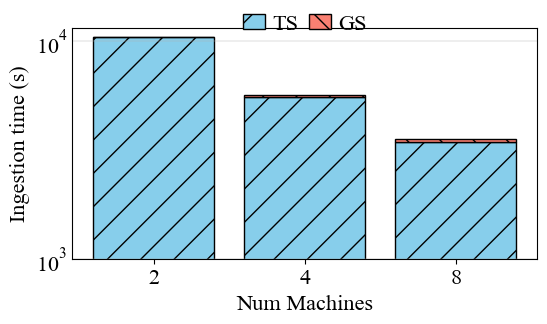

In [256]:
def plot_stacked_elapsed_times(df, model_filter, threads_filter, dataset_filter):
    """  
    Build a stacked bar chart similar to the Tableau screenshot, using a consistent style.  

    Parameters:  
    - df: pandas DataFrame containing columns:  
        ['model', 'threads', 'datasetSize', 'numMachines', 'graphElapsedTime', 'tsElapsedTime']  
    - model_filter: str, e.g. 'STGraph'  
    - threads_filter: int, e.g. 1  
    - dataset_filter: str, e.g. 'big_long'  
    - unit: 'ms', 's', or 'min' (default 'ms')  
    """  

    df = clean_df(df.copy(deep=True))
    filtered = df[(df["model"] == model_filter) & (df["threads"] == threads_filter) & (df["datasetSize"] == dataset_filter)]
    grouped = filtered.groupby(["Benchmark", "datasetSize", "numMachines"])[["graphElapsedTime", "tsElapsedTime", "elapsedTime"]].mean().reset_index()
    grouped = grouped.sort_values("numMachines")
    

    def print_latex2(grouped):
        latex_df = grouped \
                .rename(columns={"datasetSize": "Size", "model": "Model", "elapsedTime": "Elapsed Time (s)", "queryID": "ID", "graphElapsedTime": "GS Time (s)", "tsElapsedTime": "TS Time (s)", "numMachines": "#Machines"}) \
                .replace({"Small": "S", "Medium": "M", "Large": "L", "Big_long": "XL"}) \
                .set_index(["Benchmark", "Size", "#Machines"]) \
                .applymap(sci_format)
        print(latex_df.to_latex(index=True, float_format="%.2f", escape=False))
    print(grouped)
    print_latex2(grouped)
    
    x = np.arange(len(grouped))
    fig, ax = plt.subplots(figsize=(4 * 1.5, fig_y))
    bottom = np.zeros(len(grouped))
    for i, col in enumerate(["tsElapsedTime", "graphElapsedTime"]):
        ax.bar(
            x,
            grouped[col],
            bottom=bottom,
            color=colors[i],
            edgecolor='black',
            hatch=patterns[i],
            label=col.replace("ElapsedTime", " Latency")
        )
        bottom += grouped[col].values
    # Set X-axis labels only for actual number of machines
    ax.set_xticks(x)
    ax.set_xticklabels(grouped["numMachines"], fontsize=font)
    ax.set_xlabel("Num Machines", fontsize=font)
    ax.set_yscale("log")
    # Y-axis – linear scale with extra space above maximum
    ax.set_ylabel(f"Ingestion time (s)", fontsize=font)
    ax.set_ylim(1000, bottom.max() * 1.1)
    ax.tick_params(axis='y', which='both', length=0,labelsize=font)  # remove tick lines
    ax.grid(True, axis="y", linewidth=0.3)
    handles = [
        mpatches.Patch(facecolor=colors[i], edgecolor='black', hatch=patterns[i],
                       label=col.replace("ElapsedTime", " Latency"))
        for i, col in enumerate(["TS", "GS"])
    ]
    ax.legend(handles=handles, ncol=2, **legend_settings)
    # Adjust layout and save figure as SVG
    # plt.subplots_adjust(top=1.3, wspace=0.3)
    plt.savefig(os.path.join(figures_path, f"scaleout_ingestion_statistics.pdf"), bbox_inches='tight')
    plt.show()

# Example usage:
plot_stacked_elapsed_times(ingestion_statistics.loc[ingestion_statistics["numMachines"] > 1], "STGraph", 16, "Big_long")


Query Latency

In [257]:
from matplotlib.ticker import LogLocator, ScalarFormatter, NullFormatter

# Copy dataframe
df = query_statistics.copy(deep=True)
df = df.loc[(query_statistics["queryName"] != "AgentHistory") & (query_statistics["queryName"] != "EnvironmentCoverage")]
df["queryID"] = df["queryName"].apply(lambda row: query_names[row])
# Filter as in Tableau dashboard
df = df[(df["threads"] == 16) & (df["datasetSize"] == "Big_long") & (df["model"] == "STGraph")]

# Compute mean elapsed time grouped by Query Name and Num Machines
grouped = (
    df.groupby(["queryID", "numMachines"])["elapsedTime"]
    .mean()
    .reset_index()
)

# Sort query names consistently
query_names_sorted = sorted(grouped["queryID"].unique())

# Sort numMachines as numeric order (2,4,8,...)
machines_sorted = sorted(grouped["numMachines"].unique())

# X positions
x = np.arange(len(query_names_sorted))
bar_width = 0.20

fig, ax = plt.subplots(figsize=(12, 6))

# Draw bars
for i, m in enumerate(machines_sorted):
    # Values for each query
    values = [
        grouped[(grouped["queryID"] == q) & (grouped["numMachines"] == m)]["elapsedTime"].values[0]
        if not grouped[(grouped["queryID"] == q) & (grouped["numMachines"] == m)].empty
        else np.nan
        for q in query_names_sorted
    ]
    print(f"{m} machines ->", list(values))
    ax.bar(
        x + i * bar_width,
        values,
        width=bar_width,
        color=colors[i % len(colors)],
        edgecolor='black',
        hatch=patterns[i % len(patterns)],
        label=f"{m} Machines"
    )

# X-axis
ax.set_xticks(x + bar_width * (len(machines_sorted)-1) / 2)
ax.set_xticklabels(query_names_sorted, rotation=30, ha='right', fontsize=font)
ax.set_xlabel("Query ID", fontsize=font)

# Y-axis
ax.set_ylabel("Avg. Elapsed Time (ms)", fontsize=font)
ax.set_yscale("log")

# Major ticks = potenze di 10
ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=10))

ax.yaxis.set_minor_locator(LogLocator(base=10.0,
                                      subs=[1,2,5],
                                      numticks=50))

sf = ScalarFormatter()
sf.set_scientific(True)        # forza notazione scientifica
sf.set_powerlimits((0,0))      # forza esponente per tutti i valori
ax.yaxis.set_major_formatter(sf)
ax.yaxis.set_minor_formatter(sf)

# Grid
ax.grid(True, which="both", axis="y", linewidth=0.3)

# Legend
ax.legend(
    loc="upper center",
    ncol=len(machines_sorted),
    frameon=False,
    fontsize=font,
    bbox_to_anchor=(0.5, 1.10)
)

plt.tight_layout()
plt.savefig(os.path.join(figures_path, "scaleout_query_statistics.svg"), format='svg', bbox_inches='tight')
plt.show()

KeyError: 'EnvironmentAggregate2'